# Prediction CO2 Emissions Using Regression

The goal of this notebook is to predict CO2 emissions in g/km produced by any vehicle based on certain features. The dataset has been taken from Kaggle - https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles and contains 11 features which will leveraged to determine the CO2 emissions. The dataset originally comes from the Canada Government official open data website and was compiled over 7 years. We will be analyzing the dataset, preprocessing it and ultimately creating a Multiple Regression model to achieve our goal here.

## STEP 1 - Load the dataset and do a preliminary review

In [1]:
# Import the pandas library to load the data into a datframe
import pandas as pd

In [2]:
# Load csv file to create dataframe
data = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
# Review few dataframe observations to get an understanding of the dataset
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Check dataset dimensions. Our dataset consists of 7,385 observationsa and 12 features.
print(data.shape)
print()
# We further check the features in the dataset along with thier data types.
print(data.dtypes)
# The dataset has 12 feautres which includes both continuous as well as categorical variables.

(7385, 12)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


Below is the data dictionary for our 12 features:

- Make = Company of the vehicle
- Model = Model of the car
- Vehicle Class = Class of vehicle depending on their utility, capacity and weight
- Engine Size(L) = Size of engine used in Litre
- Cylinders = Number of cylinders
- Transmission = Transmission type with number of gears
- Fuel Type = Type of Fuel used
- Fuel Consumption City (L/100 km) = Fuel consumption in city roads (L/100 km)
- Fuel Consumption Hwy (L/100 km) = Fuel consumption in highways (L/100 km)
- Fuel Consumption Comb (L/100 km) = The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
- Fuel Consumption Comb (mpg) = The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)
- CO2 Emissions(g/km) = The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

## STEP 2 - Perform Exploratory Data Analysis (EDA) on the dataset

In [5]:
# Review summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


The table above provides summary statistics for 7 of the continuous variables from the dataset.Below are some observations:

- All the continuous variables have no missing values
- We see that the CO2 Emissions variable has a high standard deviation indicating that the feature may have some outliers.

In [6]:
# Examining correlation among the continuous variables
data.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


Text(0.5, 1, 'Correlations Between Various Vehicle Feautures')

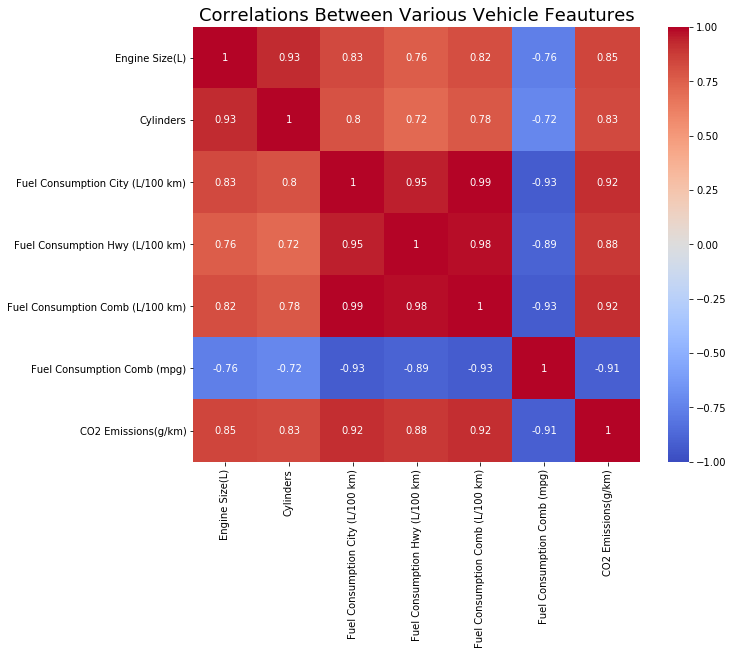

In [7]:
## Visualizing correlations
corr = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, cmap="coolwarm",center=0, annot = True, vmin= -1, vmax = 1)
ax.set_title("Correlations Between Various Vehicle Feautures", size=18)

We see from the correlation matrix above that most of the continuous features within the dataset have a positive correlation which means that an above average value of 1 feature is associated with an above average value of another feature. For example, CO2 emission has a positive correlation of 0.92 with Fuel Consumption city which implies that an above average fuel consumption is associated to above average CO2 emissions. 
The other feature that stands out is Fuel Consumption Comb (mpg) which has a negative correlations with almost all variables. This could be because of the unit of measurement here is different from the other 'Fuel' variables which are in L/100km.

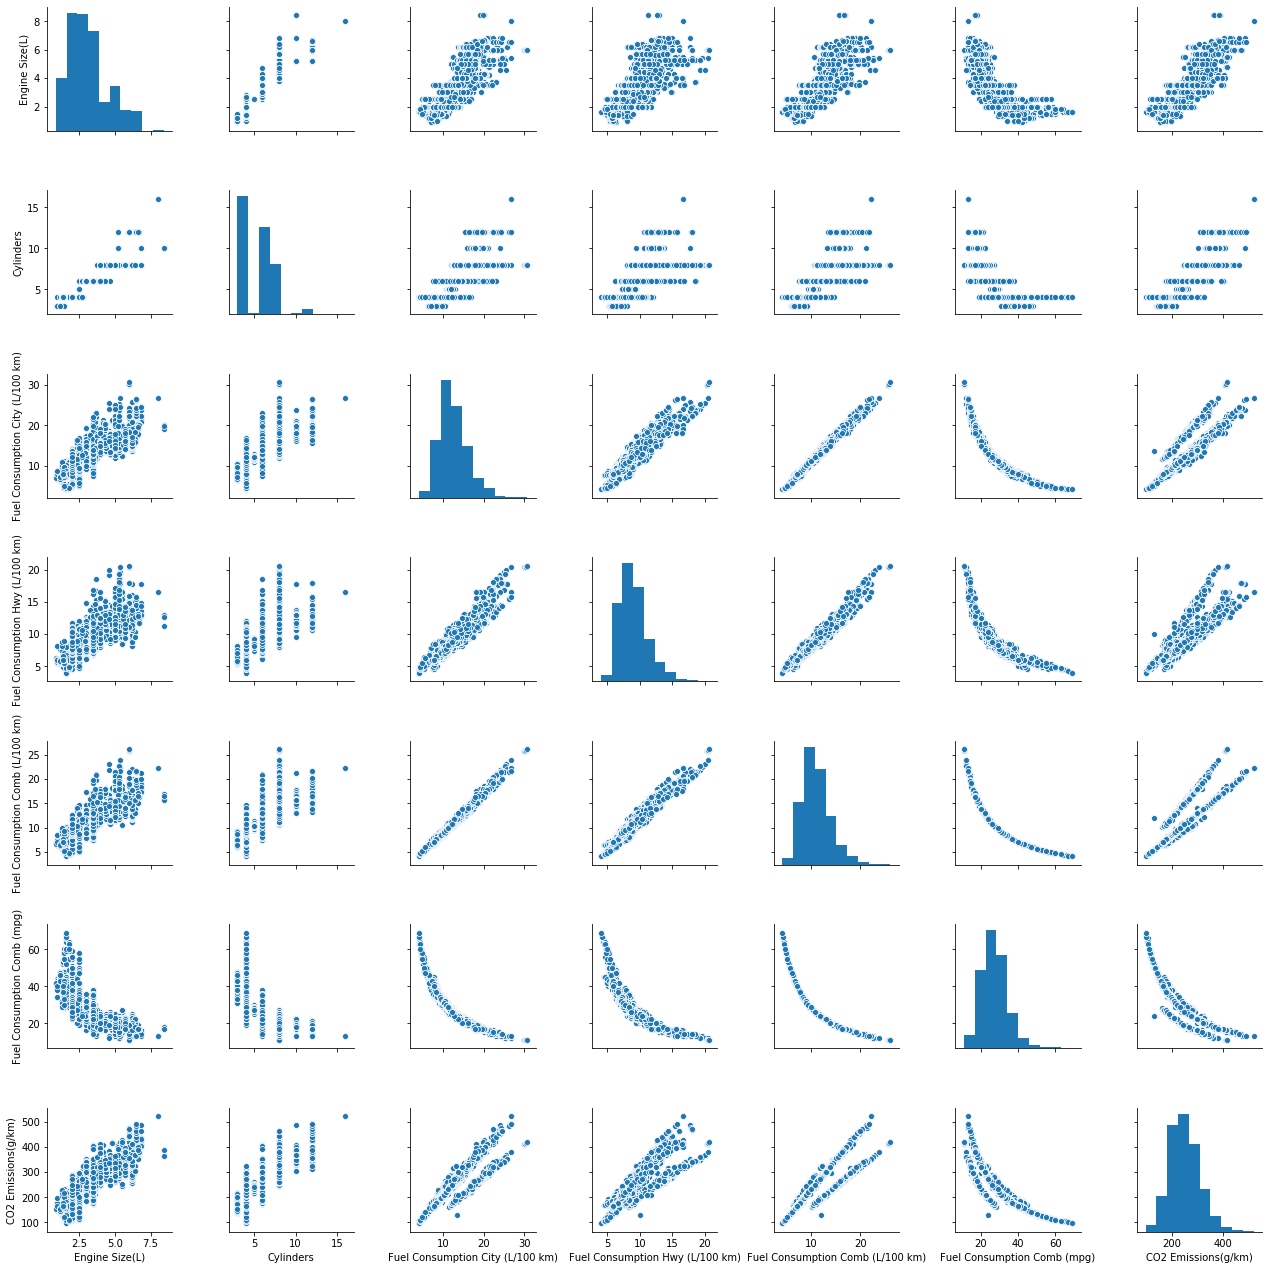

In [8]:
# Exploring Relationships Among the Continuous Features
sns.pairplot(data, kind = 'scatter')
plt.show()

We analyze the pairplots above to check if any linear relationships exist within our dataset as the end goal is to create a regression model. We see that our dependent or target variable CO2 Emission does show a linear relationship with Engine Size and Fuel Consumption. We also observe that the variable cyclinder does not display a strong relationship with any of the other numerical features.
Lastly apart from Cylinders, most features have a somewhat normal distribution.

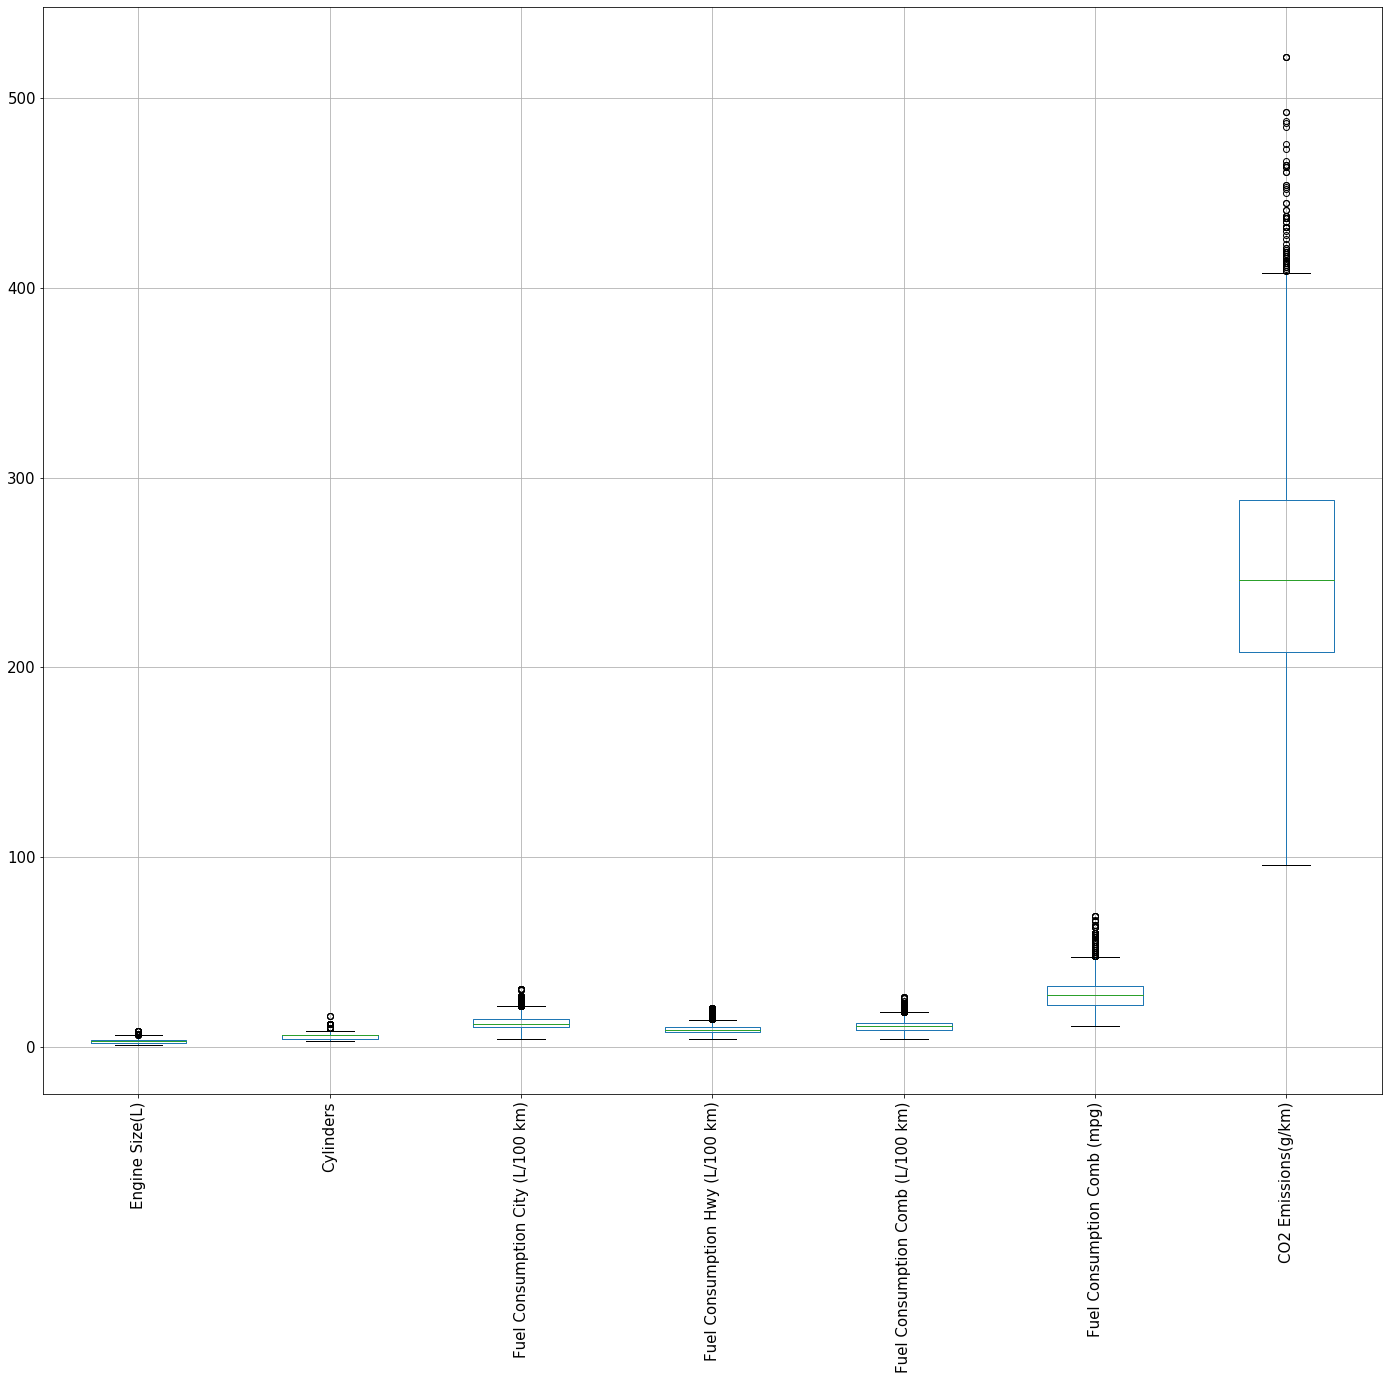

In [9]:
# Exploring outliers
data.boxplot(figsize=(24,20),rot=90, fontsize = 15)

The boxplot confirms our prior assumption that the feature CO2 Emissions does indeed have many outliers as displayed by the number of outliers outside of the min-max range.

In [10]:
# Analyzing categorical variables by creating a separate data frame of just categorical variables
categorical = data.select_dtypes('object')
categorical.shape

(7385, 5)

In [11]:
categorical.nunique(axis=0)

Make               42
Model            2053
Vehicle Class      16
Transmission       27
Fuel Type           5
dtype: int64

The above code deliniates all the categorical features along with their unique values. We see that the most of of these features have a high cardinaliy (greater than 15 unique values) and doing one hot encoding will increase the dimensionality
of the data set. Therefore, we shall remove all categorical variables except Fuel Type for simplicity.

In [12]:
# Analyzing the unique values for the Fuel Type feature.
data['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

Here is a description of all Fuel Type codes:

- X = regular gasoline
- Z = premium gasoline
- D = diesel
- E = ethanol (E85)
- N = natural gas

We observe that the majority of vehicles in our dataset operate on gasoline.

## STEP 3 - Preprocess the dataset for modeling

In [13]:
# Removing high cardinarly variables and create a new dataframe
mod_data = data.copy()
mod_data = mod_data.drop(labels =['Make', 'Model','Transmission','Vehicle Class'],axis=1)
mod_data.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [14]:
# Performing one hot encoding for Fuel Type
category = ['Fuel Type']
for column in category:
    tempdf = pd.get_dummies(mod_data[column], prefix=column)
    mod_data = pd.merge(
        left=mod_data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    mod_data = mod_data.drop(columns=column)

In [15]:
# Analyze shape of new data frame
print(mod_data.shape)

(7385, 12)


In [16]:
# Analyze columns of new data frame
print(mod_data.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_D',
       'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')


In [17]:
# Analyze few observations of new data frame
mod_data.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,1


In [18]:
# Checking dataset for missing values
mod_data.isna().sum()


Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Fuel Type_D                         0
Fuel Type_E                         0
Fuel Type_N                         0
Fuel Type_X                         0
Fuel Type_Z                         0
dtype: int64

The dataset is robust and does not have any missing values.

## STEP 4 - Building the model

In [19]:
# All features in the dataframe
mod_data.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_D',
       'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

In [20]:
# Create dataframe for dependent/target variable
target=mod_data[['CO2 Emissions(g/km)']]
print(target.shape)
print()
target.head()

(7385, 1)



,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244


In [21]:
# Create dataframe for independent/predictor variables
predictors = mod_data.drop(['CO2 Emissions(g/km)'],axis=1)
print(predictors.shape)
print()
predictors.head()

(7385, 11)



,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,0,0,0,1


In [22]:
# Express target and predictors in terms of X and Y for modeling
Y=target
X=predictors

In [23]:
# Split the dataset into training and testing datasets. We will train the model on 80% of the dataset and perform
# predictions on the remaining 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
# Review training data shape
X_train.shape, Y_train.shape

((5908, 11), (5908, 1))

In [25]:
# Review test data shape
X_test.shape, Y_test.shape

((1477, 11), (1477, 1))

In [26]:
# Define the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
# Fit the model on the training datset
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
#Make predictions on the test dataset
Y_pred = model.predict(X_test)

In [29]:
# Extracting model coefficients
model.coef_

array([[  0.12460102,   1.07220094,   6.82823578,   5.70254157,
          7.76946161,  -0.78689457,  62.40636164, -76.45625449,
        -49.41853366,  32.02970386,  31.43872265]])

In [30]:
# Reviewing features for above coefficients
X_test.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')

### Model Results

Feature Name | Coefficient
---:|:---
**Engine Size(L)** | 0.23488204 
**Cylinders** |1.23679163 
**Fuel Consumption City (L/100 km)** | 6.34605784
**Fuel Consumption Hwy (L/100 km)** |5.49571414
**Fuel Consumption Comb (L/100 km)**|8.07612395
**Fuel Consumption Comb (mpg)**|-0.87600113
**Fuel Type_D**|62.21520224
**Fuel Type_E**|-76.42824714
**Fuel Type_N**|-49.16173931
**Fuel Type_X**|31.99724682
**Fuel Type_Z**|31.37753739


Per the model results, the CO2 Emissions increase on average by one unit increase in engine size (precisely 0.23 g/km based on the coefficient value), number of cylinders and fuel consumption. From a fuel type perspective, CO2 Emissions tend to increase on average when fuel type is Diesel (D) or Gasoline (X or Z). On the other hand, CO2 emissions tend to decrease on average when fuel type is Ethanol or Natural Gas.

In [31]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Coefficient of Determination/ R Squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3.098832014326682
Mean Squared Error: 31.153576990742202
Root Mean Squared Error: 5.58153894465874
Coefficient of Determination/ R Squared: 0.9909482167413339


From the model performance metrics, it appears that 99% of the variance in the CO2 Emissions can be determined by the features within our model. While this model has great performance, we simplified the model by omitting several interesting categorical variables. It would be interesting to see if there is way to retain them and gain further insights.